# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice, i.e. a total of 5 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



C:\Users\Bruger\AppData\Local\Temp\ipykernel_30368\2897150346.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_filtered["parti"], y=data_filtered["alder"], data=data_filtered, estimator='mean', errorbar=None, palette=parti_colors)


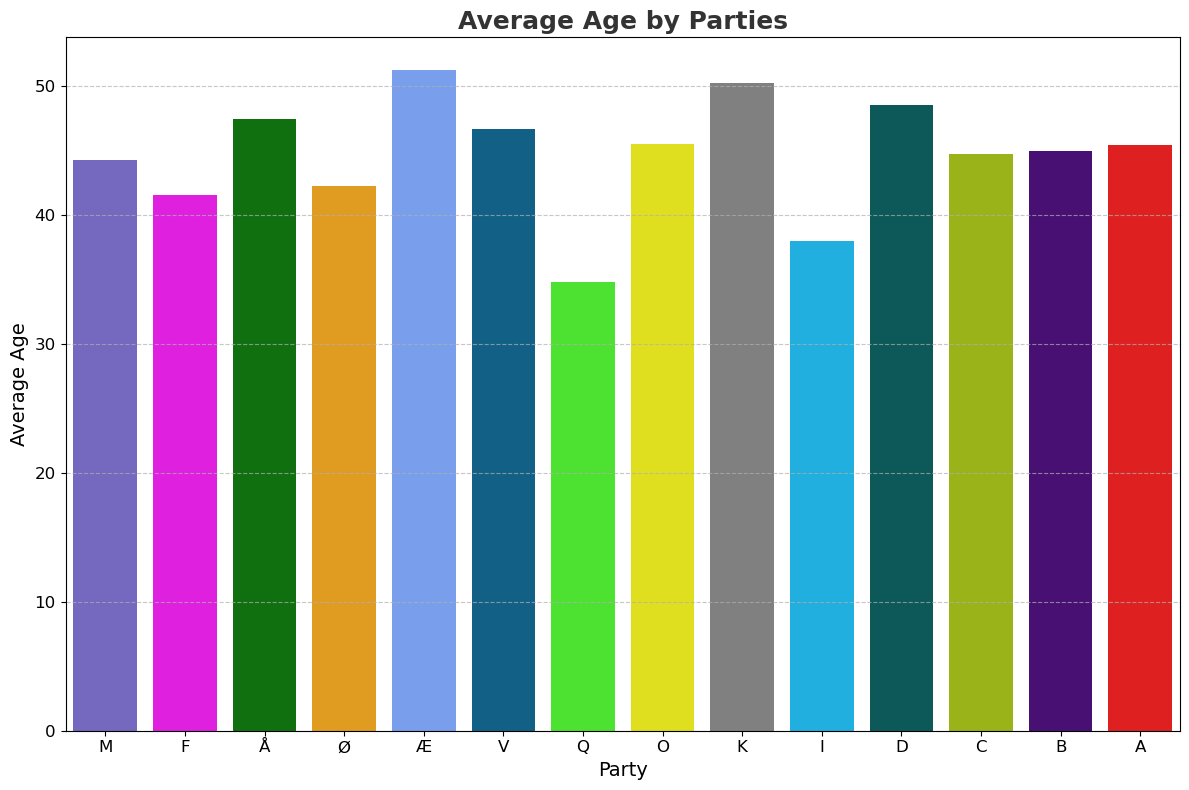

C:\Users\Bruger\AppData\Local\Temp\ipykernel_30368\2897150346.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_filtered["parti"], y=data_filtered["alder"], data=data_filtered, palette=parti_colors, linewidth=2.5, fliersize=0, boxprops=dict(alpha=0.95))


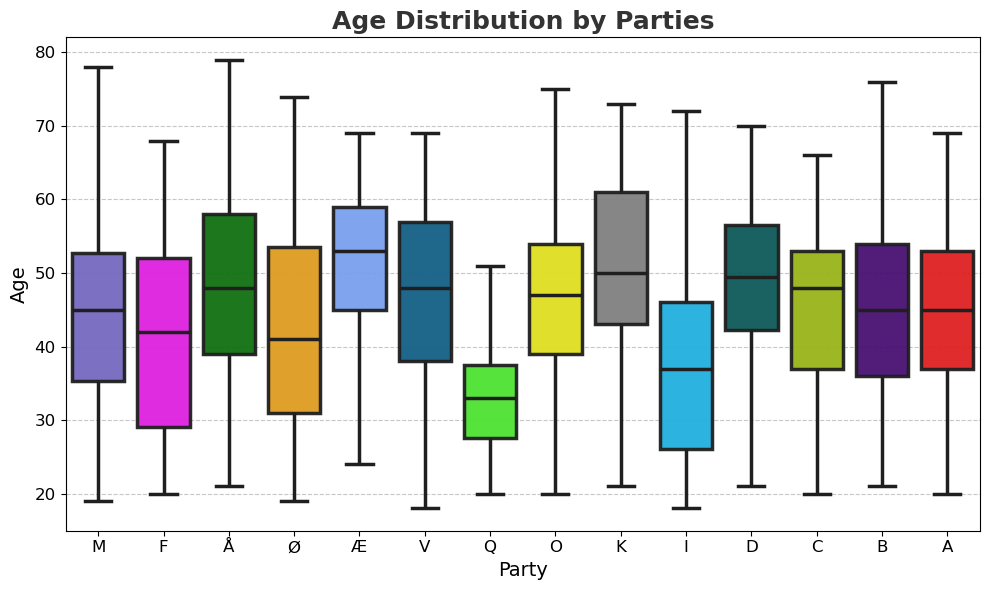

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from prettytable import PrettyTable


# 1 
data = pd.read_excel('alldata.xlsx')
questionsDR = pd.read_excel('drq.xlsx')
questionsTV = pd.read_excel('tv2q.xlsx')

# Remove rows with age 0 and parti 'Løsgænger' 
data_filtered = data.loc[data['alder'] != 0]
data_filtered = data_filtered.loc[data['parti'] != 'Løsgænger']
data_filtered = data_filtered.dropna()
data_filtered.head()

# Replace parti names with Letters
data_filtered["parti"] = data_filtered["parti"].replace("Socialdemokratiet", "A")
data_filtered["parti"] = data_filtered["parti"].replace("Radikale Venstre", "B")
data_filtered["parti"] = data_filtered["parti"].replace("Det Konservative Folkeparti", "C")
data_filtered["parti"] = data_filtered["parti"].replace("Nye Borgerlige", "D")
data_filtered["parti"] = data_filtered["parti"].replace("Socialistisk Folkeparti", "F")
data_filtered["parti"] = data_filtered["parti"].replace("Liberal Alliance", "I")
data_filtered["parti"] = data_filtered["parti"].replace("Kristendemokraterne", "K")
data_filtered["parti"] = data_filtered["parti"].replace("Moderaterne", "M")
data_filtered["parti"] = data_filtered["parti"].replace("Dansk Folkeparti", "O")
data_filtered["parti"] = data_filtered["parti"].replace("Frie Grønne, Danmarks Nye Venstrefløjsparti", "Q")
data_filtered["parti"] = data_filtered["parti"].replace("Venstre", "V")
data_filtered["parti"] = data_filtered["parti"].replace("Danmarksdemokraterne", "Æ")
data_filtered["parti"] = data_filtered["parti"].replace("Enhedslisten", "Ø")
data_filtered["parti"] = data_filtered["parti"].replace("Alternativet", "Å")

# Assign color to parties
parti_colors = {
    "A": "#ff0000",
    "B": "#4b0082",
    "C": "#aacc00",
    "D": "#006666",
    "F": "#ff00ff",
    "I": "#00bfff",
    "K": "#808080",
    "M": "#6a5acd",
    "O": "#ffff00",
    "Q": "#39ff14",
    "V": "#006699",
    "Æ": "#6699ff",
    "Ø": "#ffa500",
    "Å": "#008000",
}
data_filtered['color'] = data_filtered['parti'].map(parti_colors)

# Bar Plot of Average Age by Category
plt.figure(figsize=(12, 8))
sns.barplot(x=data_filtered["parti"], y=data_filtered["alder"], data=data_filtered, estimator='mean', errorbar=None, palette=parti_colors)
plt.title('Average Age by Parties', fontsize=18, fontweight='bold', color='#333')
plt.xlabel('Party', fontsize=14)
plt.ylabel('Average Age', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Box Plot to show the distribution of Ages by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_filtered["parti"], y=data_filtered["alder"], data=data_filtered, palette=parti_colors, linewidth=2.5, fliersize=0, boxprops=dict(alpha=0.95))
plt.title('Age Distribution by Parties', fontsize=18, fontweight='bold', color='#333')
plt.xlabel('Party', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Bruger\AppData\Local\Temp\ipykernel_30368\1636340774.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='navn', y='confidence', data=data_sorted.head(10), palette="Blues_d")


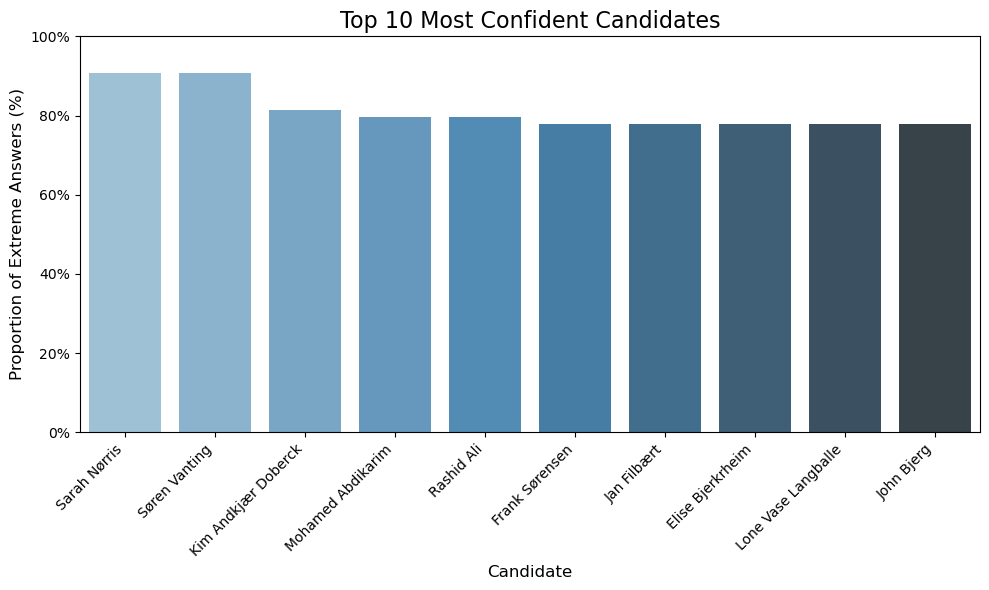

In [191]:
# 2
# Function to calculate the confidence
def calculate_confidence(row):
    total_answers = len(row)
    extreme_answers = sum((row == 2) | (row == -2))
    proportion_extreme = extreme_answers / total_answers
    return proportion_extreme

data_filtered['confidence'] = data_filtered.apply(calculate_confidence, axis=1)
data_sorted = data_filtered.sort_values(by='confidence', ascending=False)
data_sorted['confidence'] = data_sorted['confidence'] * 100

# Plot top 10 candidates
plt.figure(figsize=(10, 6))
sns.barplot(x='navn', y='confidence', data=data_sorted.head(10), palette="Blues_d")
plt.title('Top 10 Most Confident Candidates', fontsize=16)
plt.ylabel('Proportion of Extreme Answers (%)', fontsize=12)
plt.xlabel('Candidate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(tick)}%' for tick in plt.yticks()[0]])
plt.tight_layout()
plt.show()

C:\Users\Bruger\AppData\Local\Temp\ipykernel_30368\2394125718.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Intra-party Disagreement', y='parti', data=most_disagreement_parties, palette='viridis')


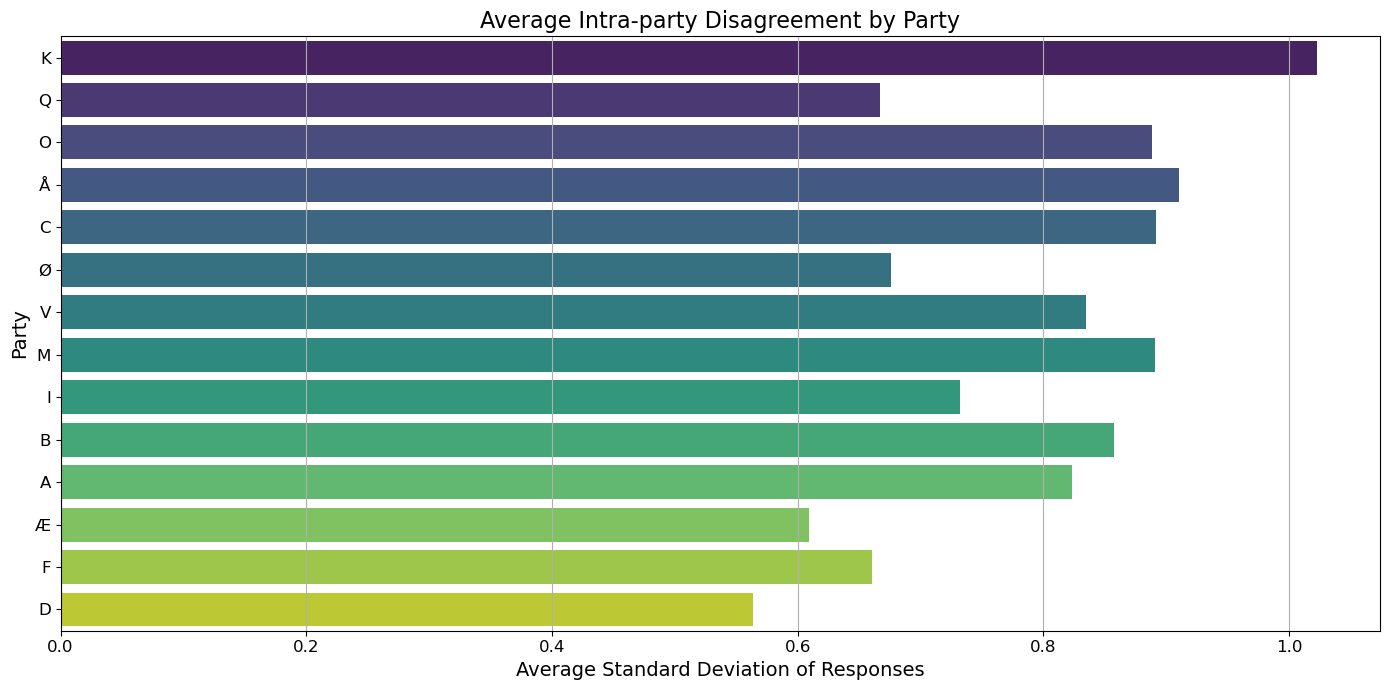

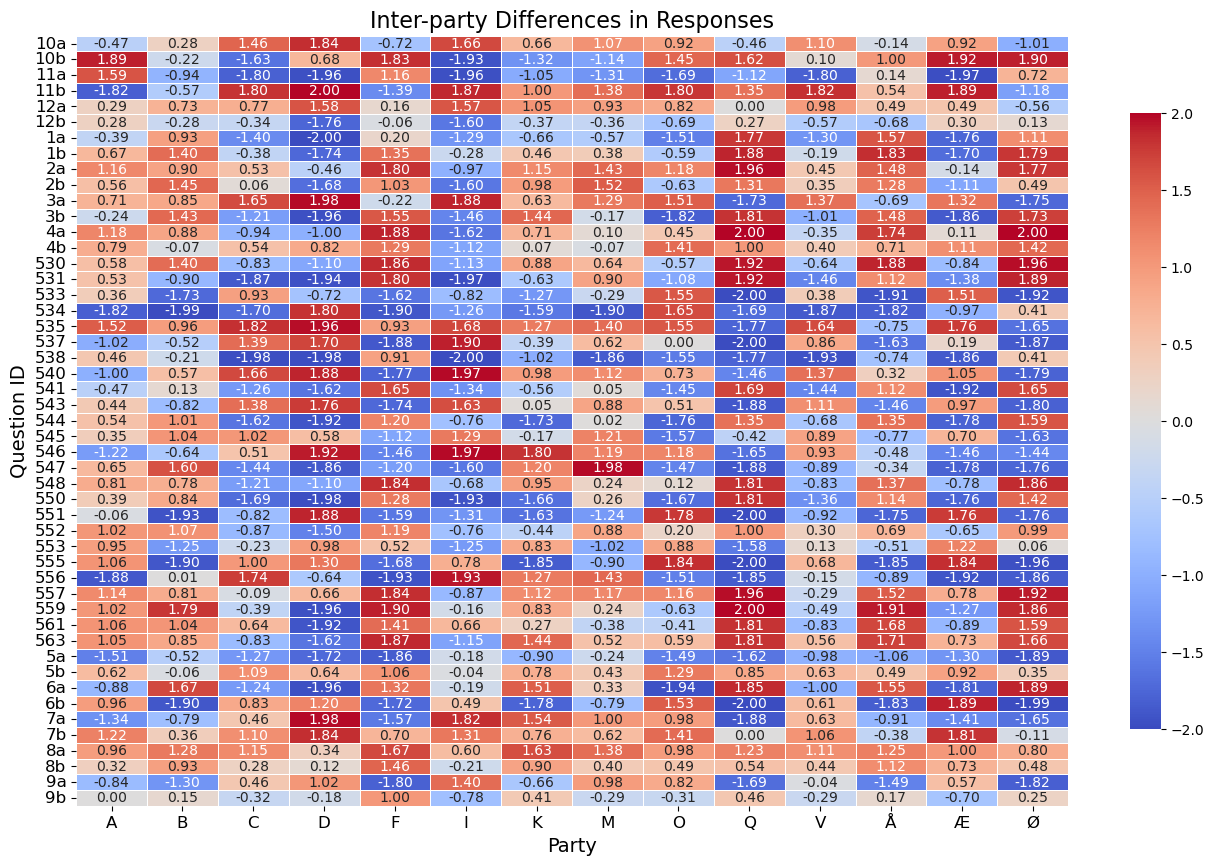

In [192]:
# 3
# Remove rows with "age = 0" and party different than "Løsgænger"
data_filtered_differences = data_filtered.loc[data_filtered['alder'] != 0]
data_filtered_differences = data_filtered_differences.loc[data_filtered['parti'] != 'Løsgænger']
data_filtered_differences = data_filtered_differences.dropna()
data_filtered_differences.head()

# Filter useless columns
questionsDR_filtered = questionsDR[['ID', 'Question', 'ArgumentFor', 'ArgumentAgainst']].copy()
questionsTV_filtered = questionsTV[['id', 'question']].copy()

# Ensure ID columns are clean
questionsDR_filtered['ID'] = questionsDR_filtered['ID'].astype(str).str.strip()
questionsTV_filtered['id'] = questionsTV_filtered['id'].astype(str).str.strip()
questionsTV_filtered.rename(columns={'id': 'ID', 'question': 'Question'}, inplace=True)

# Melt the answers DataFrame to long format
non_answer_columns = ['navn', 'parti', 'storkreds', 'alder']
data_filtered_melted = data_filtered_differences.melt(id_vars=non_answer_columns, 
                                           var_name='ID', 
                                           value_name='answer')

# Create a consolidated questions DataFrame
questionsDR_cleaned = questionsDR_filtered[['ID', 'Question']]
questionsTV_cleaned = questionsTV_filtered[['ID', 'Question']]

# Concatenate questions from both sources
merged_questions = pd.concat(
    [questionsDR_cleaned, questionsTV_cleaned],
    ignore_index=True
).drop_duplicates(subset=['ID'], keep='first')

# Merge answers with consolidated questions using outer join
merged_data = pd.merge(data_filtered_melted, merged_questions, on='ID', how='outer')

# Drop rows with NaN values in 'Question' and 'answer'
merged_data = merged_data.dropna(subset=['answer', 'Question'])


# Convert answer to numeric
merged_data['answer'] = pd.to_numeric(merged_data['answer'], errors='coerce')

# Group by party and question
grouped_data = merged_data.groupby(['parti', 'ID'])['answer'].agg(['mean', 'std', 'count']).reset_index()

# Calculate intra-party differences
intra_party_disagreements = grouped_data.groupby('parti')['std'].agg(['mean', 'max']).reset_index()
intra_party_disagreements.rename(columns={'mean': 'Average Intra-party Disagreement', 'max': 'Max Intra-party Disagreement'}, inplace=True)

# Calculate inter-party differences using pivot_table
inter_party_differences = grouped_data.pivot_table(index='ID', columns='parti', values='mean')
inter_party_differences.fillna(0, inplace=True)

# Identify parties with the most internal disagreements
most_disagreement_parties = intra_party_disagreements.sort_values(by='Max Intra-party Disagreement', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x='Average Intra-party Disagreement', y='parti', data=most_disagreement_parties, palette='viridis')
plt.title('Average Intra-party Disagreement by Party', fontsize=16)
plt.xlabel('Average Standard Deviation of Responses', fontsize=14)
plt.ylabel('Party', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Visualization of inter-party differences using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(inter_party_differences, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Inter-party Differences in Responses', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Question ID', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

In [193]:
# Sample 10% of the data for faster processing
merged_data_sample = merged_data.sample(frac=0.1, random_state=42)

# Prepare features and target
X = merged_data_sample.drop(columns=['parti'])  # Drop target column
y = merged_data_sample['parti']  # Target variable

# Encode party affiliations
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# Define preprocessing for categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),  # Handle unknown categories
        ('num', StandardScaler(), numerical_cols)  # Scale numerical features
    ],
    remainder='passthrough'  # Keep the rest of the columns unchanged
)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=42)  # Smaller test size

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosted Tree': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC()
}

# Train models and store results
results = {}
for model_name, model in models.items():
    # Create a pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])
    
    # Train the model
    pipeline.fit(X_train, y_train)  # Fit the pipeline on the training data
    
    # Get predictions
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy * 100  # Store accuracy in percentage

# Print model accuracies
print("Model Accuracies (%):")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.2f}%")

# Use Logistic Regression to predict party affiliations for analysis
logistic_model = LogisticRegression(max_iter=1000)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', logistic_model)])

# Train the Logistic Regression model
pipeline.fit(X_train, y_train)

# Get predictions for the entire dataset
merged_data_sample['predicted_party'] = label_encoder.inverse_transform(pipeline.predict(X))

# Find candidates predicted to belong to another party
wrong_party_candidates = merged_data_sample[merged_data_sample['parti'] != merged_data_sample['predicted_party']]

# Check if there are misclassifications and create a table
if not wrong_party_candidates.empty:
    # Create a PrettyTable instance
    misclassifications_table = PrettyTable()
    misclassifications_table.field_names = ["Candidate", "Actual Party", "Predicted Party"]

    # Add rows to the PrettyTable
    for index, row in wrong_party_candidates.iterrows():
        misclassifications_table.add_row([row['navn'], row['parti'], row['predicted_party']])
    
    print("Candidates Predicted to Belong to Another Party:")
    print(misclassifications_table)
else:
    print("No misclassifications found.")

Model Accuracies (%):
Decision Tree: 95.43%
Random Forest: 86.06%
Gradient Boosted Tree: 96.63%
Logistic Regression: 96.15%
Support Vector Machine: 60.82%
Candidates Predicted to Belong to Another Party:
+------------------------------+--------------+-----------------+
|          Candidate           | Actual Party | Predicted Party |
+------------------------------+--------------+-----------------+
|        Claus Engskov         |      O       |        A        |
|    Kurt Vind Christiansen    |      I       |        K        |
|         Henrik Dahl          |      I       |        C        |
|       Claus Gisselmann       |      Æ       |        M        |
|     Ane Line Søndergaard     |      Å       |        A        |
|      Marianne Karlberg       |      Q       |        V        |
| Christoffer Buster Reinhardt |      C       |        I        |
|     Freya Luna Andersen      |      M       |        I        |
|         Nils Sjøberg         |      B       |        Æ        |
|   